In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn import datasets, linear_model, metrics
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


In [37]:
file_path = r"C:\Users\mkiarie\Documents\DATA SCIENCE WANJA\machine learning 1\world_meat_consumpiton_trends.csv"

In [38]:
mc = pd .read_csv(file_path)
omc =pd.read_csv(file_path)

In [39]:
mc.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000004,NaN
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.808401,NaN
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.278166,NaN
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.244478,NaN
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.541244,NaN


In [40]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    12140 non-null  object 
 1   INDICATOR   12140 non-null  object 
 2   SUBJECT     12140 non-null  object 
 3   MEASURE     12140 non-null  object 
 4   FREQUENCY   12140 non-null  object 
 5   TIME        12140 non-null  int64  
 6   Value       12140 non-null  float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 758.9+ KB


In [41]:
cols = mc.columns
print(cols)

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')


In [42]:
mc.describe()

,TIME,Value,Flag Codes
count,12140.000000,1.214000e+04,0.0
mean,2009.042175,2.245855e+03,NaN
std,11.233660,1.040812e+04,NaN
min,1990.000000,7.505681e-08,NaN
25%,1999.000000,5.013586e+00,NaN
50%,2009.000000,2.427455e+01,NaN
75%,2019.000000,4.355984e+02,NaN
max,2028.000000,1.402526e+05,NaN


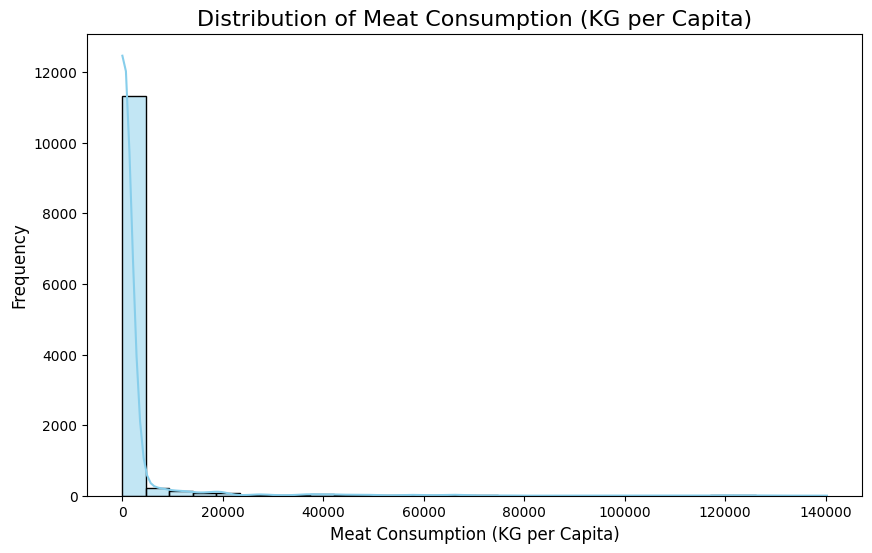

In [43]:
#this is the distribution of meat consumption of KG per Capita 
plt.figure(figsize=(10, 6))

# Plot the distribution of the 'Value' column (meat consumption)
sns.histplot(mc['Value'], kde=True, bins=30, color='skyblue')

# Set title and labels
plt.title('Distribution of Meat Consumption (KG per Capita)', fontsize=16)
plt.xlabel('Meat Consumption (KG per Capita)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()


MISSINGNESS

In [44]:
percentage_missing = mc.isnull().mean()*100

percentage_missing

LOCATION        0.0
INDICATOR       0.0
SUBJECT         0.0
MEASURE         0.0
FREQUENCY       0.0
TIME            0.0
Value           0.0
Flag Codes    100.0
dtype: float64

There is one whole coloumn that is missing data at an 100% hence for this we will drop this coloumn for two reasons
1) 100%missingness
2) it doesn't affect the information or the data needed for analysis

In [45]:
mc.drop(columns='Flag Codes', inplace=True)
print("\nOriginal DataFrame after dropping column 'Flag Codes' in place:")
print(mc)



Original DataFrame after dropping column 'Flag Codes' in place:
      LOCATION    INDICATOR SUBJECT     MEASURE FREQUENCY  TIME       Value
0          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1990    0.000004
1          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1991   27.808401
2          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1992   26.278166
3          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1993   26.244478
4          AUS  MEATCONSUMP    BEEF      KG_CAP         A  1994   25.541244
...        ...          ...     ...         ...       ...   ...         ...
12135     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2024  732.149998
12136     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2025  737.008238
12137     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2026  741.104095
12138     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2027  743.489549
12139     EU27  MEATCONSUMP   SHEEP  THND_TONNE         A  2028  747.011872

[12140 rows x 7 column

In [46]:
mc.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000004
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.808401
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.278166
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.244478
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.541244


In [50]:
msno.maxtrix(mc)

AttributeError: module 'missingno' has no attribute 'maxtrix'